# Under- and oversampling techniques

Let's consider the following dataset again:

## The data

In [2]:
##### added line to ensure plots are showing
%matplotlib inline
#####

import pandas as pd

import matplotlib.pyplot as plt

!pip install imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

# Use this code if you need large figures (on high-resolution screens)
# For bigger pictures:
#plt.rcParams["figure.dpi"] = 144

data = pd.read_csv("absent.csv",sep=';',index_col=0)

You should consider upgrading via the 'C:\Users\xiyua\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


There is clearly an imbalance in terms of who is, and who is not, a social smoker:

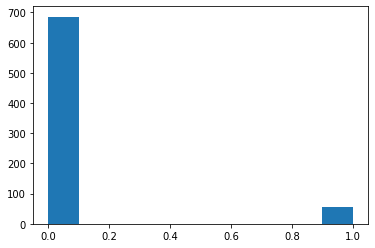

In [3]:
plt.hist(data['Social smoker'])
plt.show()

The distribution is quite skewed.

Can we still use the data to predict whether someone is a social smoker or not? (just ignore that this is not the original dependent variable of the dataset, it serves as a nice example)

Let's look at two variables, service time and age:

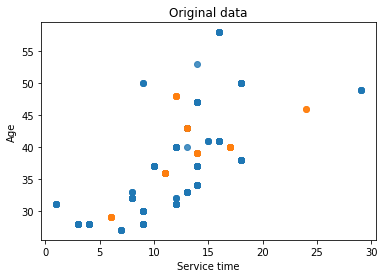

In [5]:
# You can change the variables if you want to look into other indepndent variables later yourself
var_1 = 'Service time'
var_2 = 'Age'

# Our independent variables
# convert two variables as a 2-dimentional array
X = data[[var_1,var_2]]

# Our dependent variable
y = data['Social smoker']

for i in [0,1]:
    plt.scatter(X[y == i][var_1], X[y == i][var_2], alpha=.8)

plt.xlabel(var_1)
plt.ylabel(var_2)
plt.title('Original data')
plt.show()

## Undersampling

Let's try undersampling first:

   Service time  Age
0            13   43
1            13   43
2            18   38
3            14   47
4            14   47


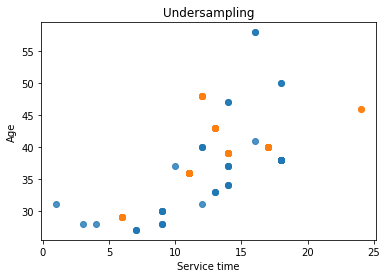

In [6]:
# Class to perform random under-sampling.
# Under-sample the majority class(es) by randomly picking samples with or without replacement.
rus = RandomUnderSampler(random_state=10)

# Resample the dataset.
# Input:
# X – (n_samples, n_features) Matrix containing the data which have to be sampled.
# y – Corresponding label for each sample in X.
# Returns:
# The array containing the resampled data.
X_s, y_s = rus.fit_resample(X, y)


# For easy access to the columns
X_s = pd.DataFrame(X_s,columns=[var_1,var_2])
print(X_s.head())


for i in [0,1]: 
    plt.scatter(X_s[y_s == i][var_1], X_s[y_s == i][var_2], alpha=.8)
plt.title('Undersampling')
plt.xlabel(var_1)
plt.ylabel(var_2)
plt.show()

**A lot of non-smokers (shown in blue) are removed.**

## Oversampling

Now we'll try oversampling:

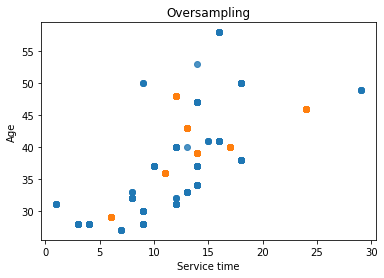

In [13]:
# perform random over-sampling.
# over-sample the minority class(es) by picking samples at random with replacement.
ros = RandomOverSampler(random_state=10)
X_s, y_s = ros.fit_resample(X, y)

X_s = pd.DataFrame(X_s,columns=[var_1,var_2])

for i in [0,1]: 
    plt.scatter(X_s[y_s == i][var_1], X_s[y_s == i][var_2], alpha=.8)
plt.title('Oversampling')
plt.xlabel(var_1)
plt.ylabel(var_2)
plt.show()

## SMOTE

Not much has changed compared to the original dataset. You should now try the other techniques we covered in the previous activity yourself:

In [7]:
def apply_SMOTE(X,y):
    
    # Create a SMOTE instance and fit it to the data
    sm = SMOTE()
    X_s, y_s = sm.fit_resample(X, y)

    X_s = pd.DataFrame(X_s,columns=[var_1,var_2])

    # Add all the data points to a plot as above, separated by class to have different colors
    for i in [0,1]: 
        plt.scatter(X_s[y_s == i][var_1], X_s[y_s == i][var_2], alpha=.8)
    plt.title('SMOTE')
    plt.xlabel(var_1)
    plt.ylabel(var_2)
    
    plt.show()

Finally, verify your answer:

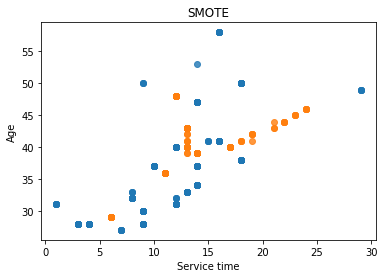

In [8]:
apply_SMOTE(X,y)